In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib import rc
rc('text', usetex=True)
rc('font', family='serif')
%config InlineBackend.figure_format = 'retina'
warnings.filterwarnings('ignore')

In [26]:
def construct_scaled_polynomial_with_chebyshev_nodes(degree, length=100):
    """
    Constructs and scales a polynomial using Chebyshev nodes for the roots.
    This approach minimizes interpolation error and divergence near -1 and 1.

    Parameters:
    - degree (int): Degree of the polynomial.
    - length (int): Number of points in the series for evaluation.

    Returns:
    - np.ndarray: Input values (x).
    - np.ndarray: Scaled output values (y) of the polynomial.
    """
    k = np.arange(1, degree + 1)
    roots = np.cos((2 * k - 1) * np.pi / (2 * degree))

    x = np.linspace(-1, 1, length)
    p = np.poly1d(np.poly(roots))
    y = p(x)
    y_scaled = y / np.max(np.abs(y))
    return x, y_scaled


def plot_polynomial(x, y, title="Polynomial with Chebyshev Nodes"):
    """
    Plots the scaled polynomial with enhanced aesthetics and LaTeX fonts.

    Parameters:
    - x (np.ndarray): Input values.
    - y (np.ndarray): Scaled output values of the polynomial.
    - title (str): Title for the plot.
    """
    sns.set(style="darkgrid")
    plt.figure(figsize=(10, 6))
    sns.lineplot(x=x, y=y)
    plt.xlabel("$x$")
    plt.ylabel("$y$")
    plt.title(title)
    plt.ylim(-1, 1)
    plt.show()

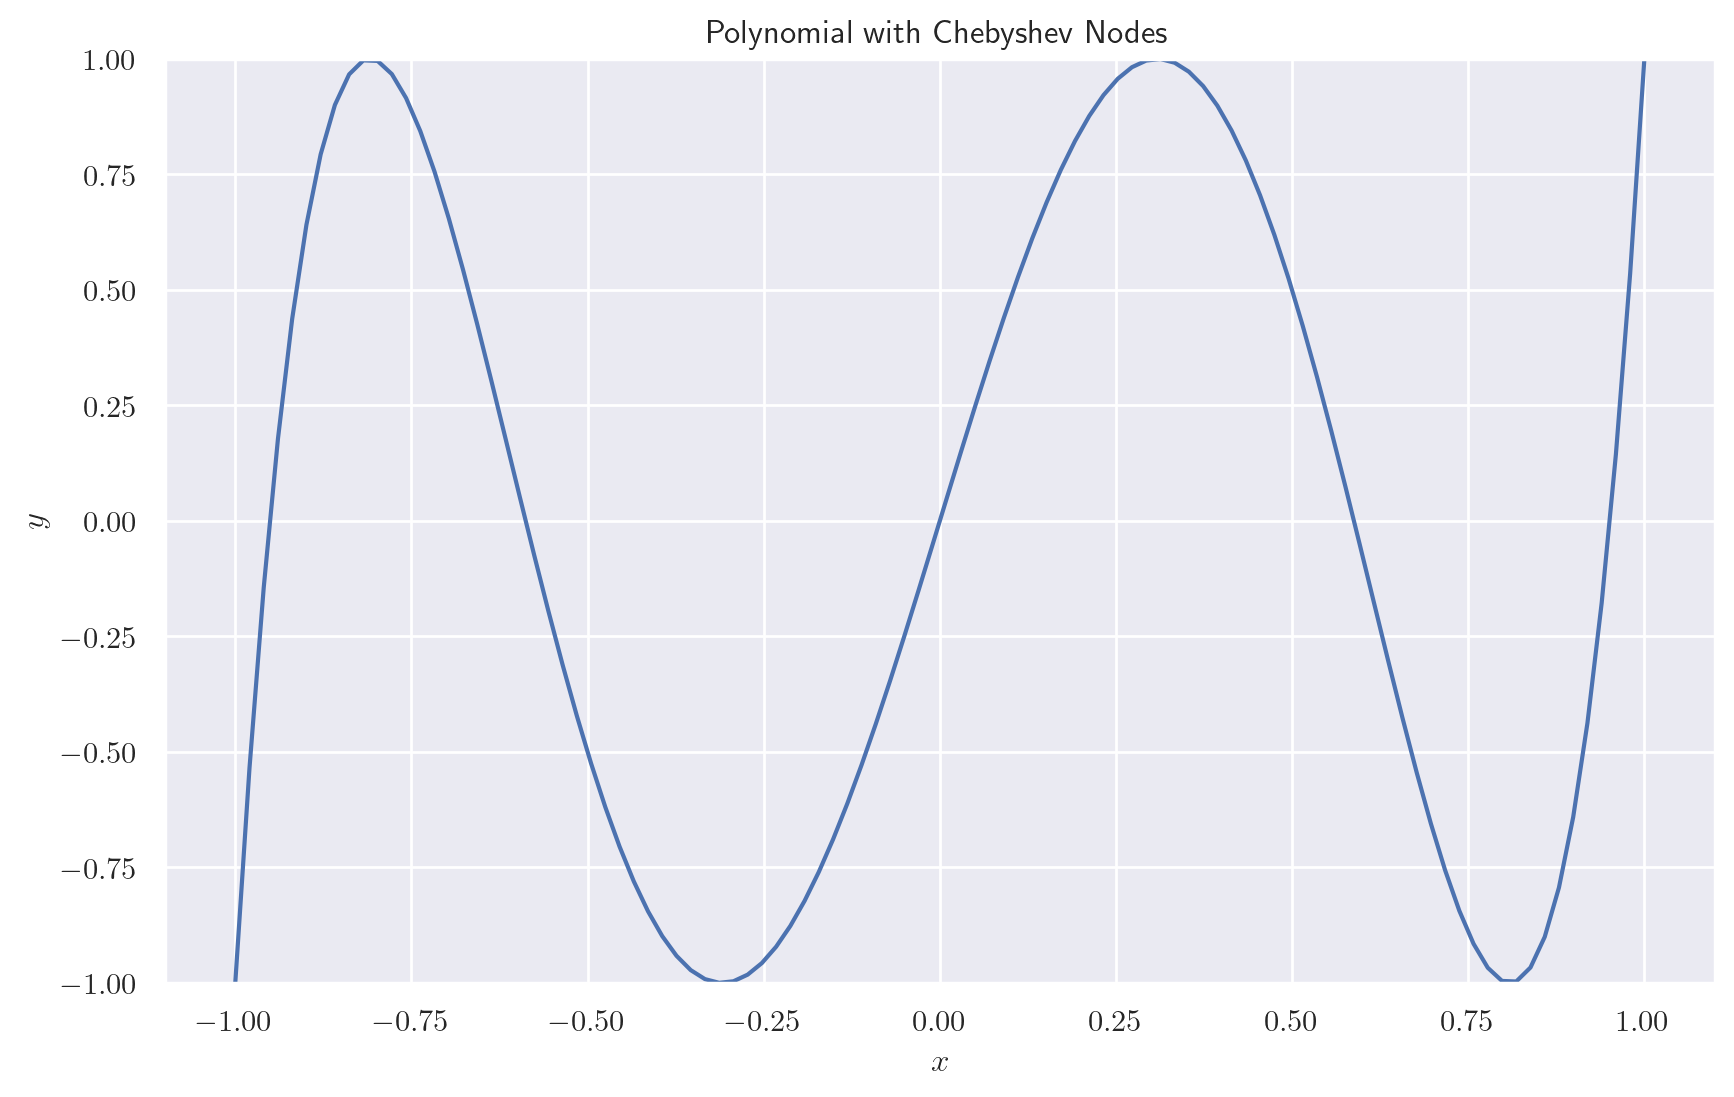

In [27]:
# Example usage
degree = 5  # Degree of the polynomial to be constructed with Chebyshev nodes
x, y_scaled = construct_scaled_polynomial_with_chebyshev_nodes(degree)
plot_polynomial(x, y_scaled)